# Importing Libraries and EV Sales & Stock Data Set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import quandl
import statsmodels.api as sm 
import os
import warnings # This is a library that handles warnings.
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight') 

In [3]:
%matplotlib inline

In [4]:
path = r'/Users/danielmccormick/Desktop/CareerFoundry/Advanced Analytics & Dashboard Design'

In [5]:
df_sales_stock_share = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_Sales_Stock_share_imputed.csv'))

In [6]:
df_sales_stock_share.head()

,region,vehicle_type,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold
0,Australia,Cars,2010,0,0,0.00000,0.00000,0.00000
1,Australia,Cars,2011,49,49,0.00007,0.00000,1.00000
2,Australia,Cars,2012,250,300,0.00030,0.00003,0.83333
3,Australia,Cars,2013,290,590,0.00034,0.00005,0.49153
4,Australia,Cars,2014,1320,1880,0.00160,0.00017,0.70213


# Data Wrangling and Reformatting

In [7]:
# Updating year column to be an Object so it can be concatenated into a format suitable for using with datetime
df_sales_stock_share['year'] = df_sales_stock_share['year'].apply(lambda x: str(x))
print(df_sales_stock_share.dtypes)

region                  object
vehicle_type            object
year                    object
ev_sales                 int64
ev_stock                 int64
ev_sales_share         float64
ev_stock_share         float64
share_of_stock_sold    float64
dtype: object


In [8]:
df_sales_stock_share['full_date'] = "01-01-" + df_sales_stock_share['year']

In [9]:
df_sales_stock_share.head()

,region,vehicle_type,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold,full_date
0,Australia,Cars,2010,0,0,0.00000,0.00000,0.00000,01-01-2010
1,Australia,Cars,2011,49,49,0.00007,0.00000,1.00000,01-01-2011
2,Australia,Cars,2012,250,300,0.00030,0.00003,0.83333,01-01-2012
3,Australia,Cars,2013,290,590,0.00034,0.00005,0.49153,01-01-2013
4,Australia,Cars,2014,1320,1880,0.00160,0.00017,0.70213,01-01-2014


# Creating a Subset of Data for just EV Sales

In [10]:
# Creating a subset of the dataframe that only includes rows for the entire World and Total vehicles
df_total = df_sales_stock_share[(df_sales_stock_share['region']== 'World') & (df_sales_stock_share['vehicle_type'] == 'Total')]

In [11]:
df_total.head(20)

,region,vehicle_type,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,share_of_stock_sold,full_date
2327,World,Total,2010,11194,28010,0.00013,0.00003,0.39964,01-01-2010
2328,World,Total,2011,53010,80820,0.00063,0.00008,0.65590,01-01-2011
2329,World,Total,2012,132061,220090,0.00149,0.00019,0.60003,01-01-2012
2330,World,Total,2013,218615,434570,0.00244,0.00037,0.50306,01-01-2013
2331,World,Total,2014,357700,786660,0.00389,0.00065,0.45471,01-01-2014
2332,World,Total,2015,715780,1469400,0.00759,0.00116,0.48712,01-01-2015
2333,World,Total,2016,894175,2386005,0.00889,0.00186,0.37476,01-01-2016
2334,World,Total,2017,1438670,3726700,0.01426,0.00280,0.38604,01-01-2017
2335,World,Total,2018,2286390,6034800,0.02149,0.00441,0.37887,01-01-2018
2336,World,Total,2019,2259380,8334800,0.02315,0.00577,0.27108,01-01-2019


In [12]:
# Creating another subset that only includes date and EV sales since this will be the focus of the first time series
# analysis
df_total_sales = df_total[['full_date', 'ev_sales']]

In [13]:
df_total_sales

,full_date,ev_sales
2327,01-01-2010,11194
2328,01-01-2011,53010
2329,01-01-2012,132061
2330,01-01-2013,218615
2331,01-01-2014,357700
2332,01-01-2015,715780
2333,01-01-2016,894175
2334,01-01-2017,1438670
2335,01-01-2018,2286390
2336,01-01-2019,2259380


In [14]:
# Using datetime to set the "full_date" column as the index. 

from datetime import datetime

df_total_sales['datetime'] = pd.to_datetime(df_total_sales['full_date']) # Create a datetime column from "Date.""
df_total_sales = df_total_sales.set_index('datetime') # Set the datetime as the index of the dataframe.
df_total_sales.drop(['full_date'], axis=1, inplace=True) # Drop the "Date" column.
df_total_sales.head()

,ev_sales
datetime,
2010-01-01,11194
2011-01-01,53010
2012-01-01,132061
2013-01-01,218615
2014-01-01,357700


In [15]:
df_total_sales

,ev_sales
datetime,
2010-01-01,11194
2011-01-01,53010
2012-01-01,132061
2013-01-01,218615
2014-01-01,357700
2015-01-01,715780
2016-01-01,894175
2017-01-01,1438670
2018-01-01,2286390


# Performing Time Series Analysis on EV Sales

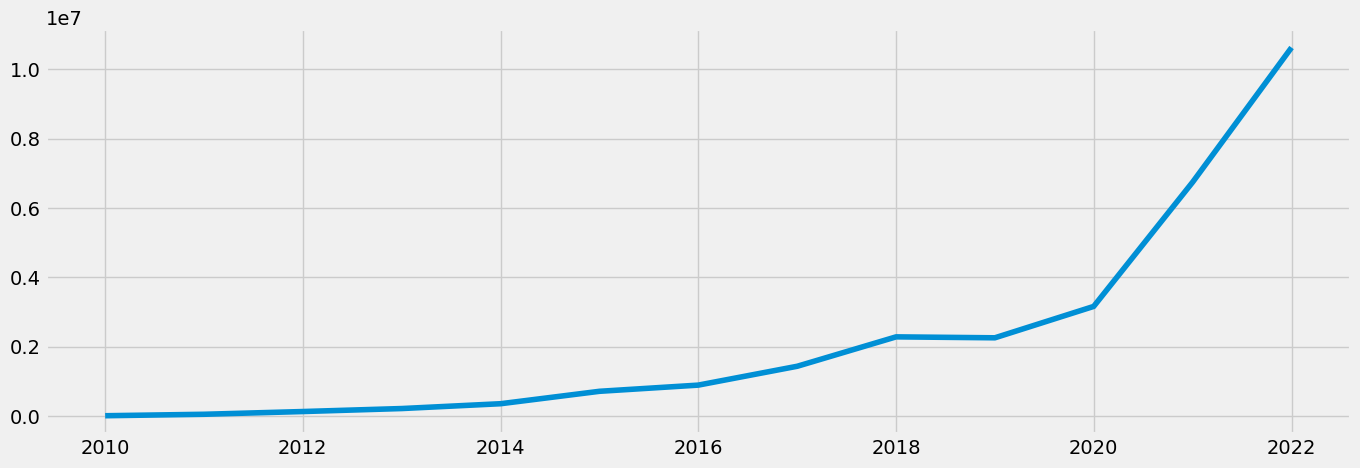

In [16]:
# Plot the new sales data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_total_sales)

Since the data is clearly not linear and seems to be showing exponential growth, a multiplicative model for decomposition will be used. 

In [17]:
# Decompose the time series using a multiplicative model

decomposition_sales = sm.tsa.seasonal_decompose(df_total_sales, model='multiplicative')

In [18]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

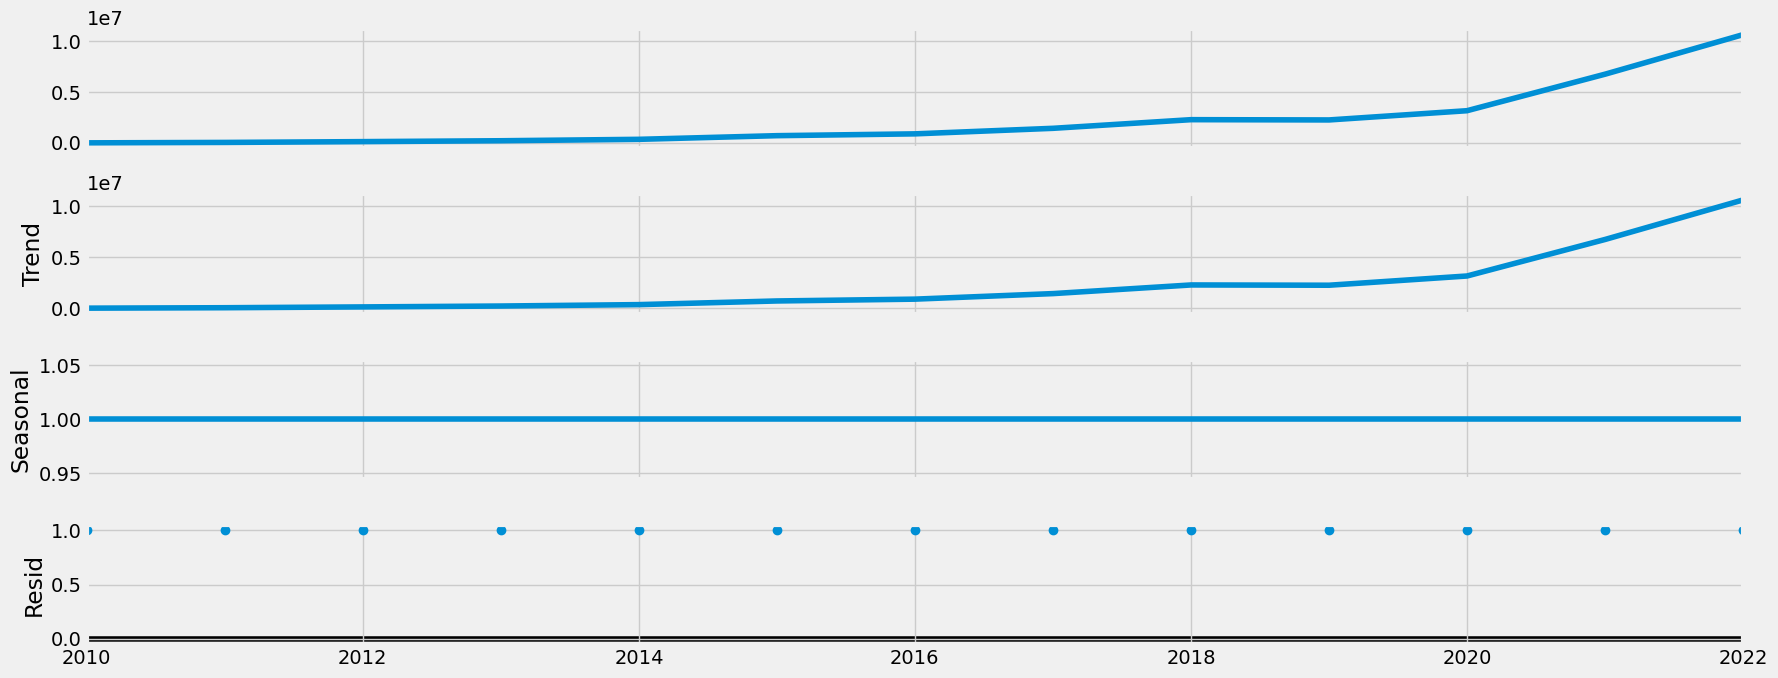

In [19]:
# Plot the separate components

decomposition_sales.plot()
plt.show()

Based on the decomposition, it seems as though the entire driver of the change in EV sales of the time series is due to increasing trend. Since the data is at an annual level there would be no way to track seasonality, and there does not appear to be any significant "noise" driving changes in the data. 

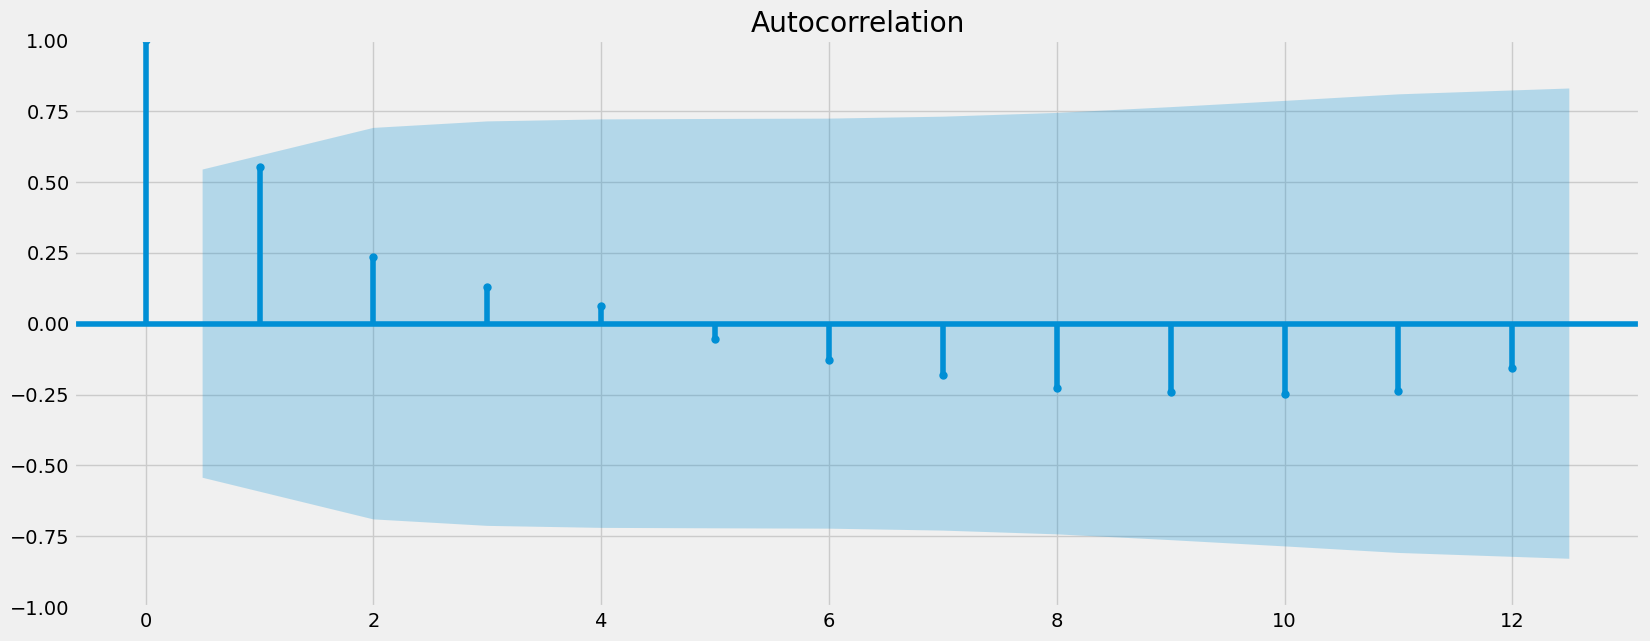

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_total_sales)
plt.show()

It does not appear as though autolcorrelation is an issue with the data set. There are not a lot of data points that are significantly correlated with the lagging data points as shown by the lack of data that fall outside of the blue confidence interval. 

In [21]:
# performing a dickey fuller test to confirm the data is not stationary. 

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_total_sales['ev_sales'])

Dickey-Fuller Stationarity test:
Test Statistic                 2.894132
p-value                        1.000000
Number of Lags Used            4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


It was already pretty clear that the data is non-stationary, but the results of the Dickey Fuller test prove it statistically. With a test statistic of 2.89 vs. a critical value of -3.37, the null hypothesis that there is a unit root (and that the data is non-stationary) cannot be rejected. As a result, the data cannot be used in a time series analysis in its current form. 

Now that it is confirmed the data is not stationary, differencing will be used to try to make the data set stationary. 

In [22]:
df_total_sales_diff = df_total_sales - df_total_sales.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [23]:
df_total_sales_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [24]:
df_total_sales_diff.head()

,ev_sales
datetime,
2011-01-01,41816.0
2012-01-01,79051.0
2013-01-01,86554.0
2014-01-01,139085.0
2015-01-01,358080.0


In [25]:
# Performing the Dickey Fuller test again to determine if differencing resulted in stationary data. 


dickey_fuller(df_total_sales_diff['ev_sales'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.641452
p-value                        0.997977
Number of Lags Used            4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


The test statistic is closer to the level where the null hypothesis could be rejected, but is still way to large to actually reject it. As a result the it can be concluded that even with one round of differencing, the data is still non-stationary. Now differencing will be repeated until the Dickey Fuller test results show that the data is stationary. 

In [26]:
df_total_sales_diff_2 = df_total_sales_diff - df_total_sales_diff.shift(1)

In [27]:
df_total_sales_diff_2.dropna(inplace = True)

In [28]:
dickey_fuller(df_total_sales_diff_2['ev_sales'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.237821
p-value                        0.996237
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Still not stationary

In [29]:
df_total_sales_diff_3 = df_total_sales_diff_2 - df_total_sales_diff_2.shift(1)

In [30]:
df_total_sales_diff_3.dropna(inplace = True)

In [31]:
dickey_fuller(df_total_sales_diff_3['ev_sales'])

Dickey-Fuller Stationarity test:
Test Statistic                -1.172598
p-value                        0.685271
Number of Lags Used            3.000000
Number of Observations Used    6.000000
Critical Value (1%)           -5.354256
Critical Value (5%)           -3.646238
Critical Value (10%)          -2.901198
dtype: float64


Still not stationary

In [32]:
df_total_sales_diff_4 = df_total_sales_diff_3 - df_total_sales_diff_3.shift(1)

In [33]:
df_total_sales_diff_4.dropna(inplace = True)

In [34]:
dickey_fuller(df_total_sales_diff_4['ev_sales'])

Dickey-Fuller Stationarity test:
Test Statistic                -8.203966e+00
p-value                        7.106560e-13
Number of Lags Used            1.000000e+00
Number of Observations Used    7.000000e+00
Critical Value (1%)           -4.938690e+00
Critical Value (5%)           -3.477583e+00
Critical Value (10%)          -2.843868e+00
dtype: float64


On the fourth round of differencing the test statistic is significantly below the critical value and the p-value is well below 0.05. This means the null hypothesis that there is a unit root (the data is non-stationary) can be rejected and that the results are statistically significant. As a result the data can be used for time series analysis. 

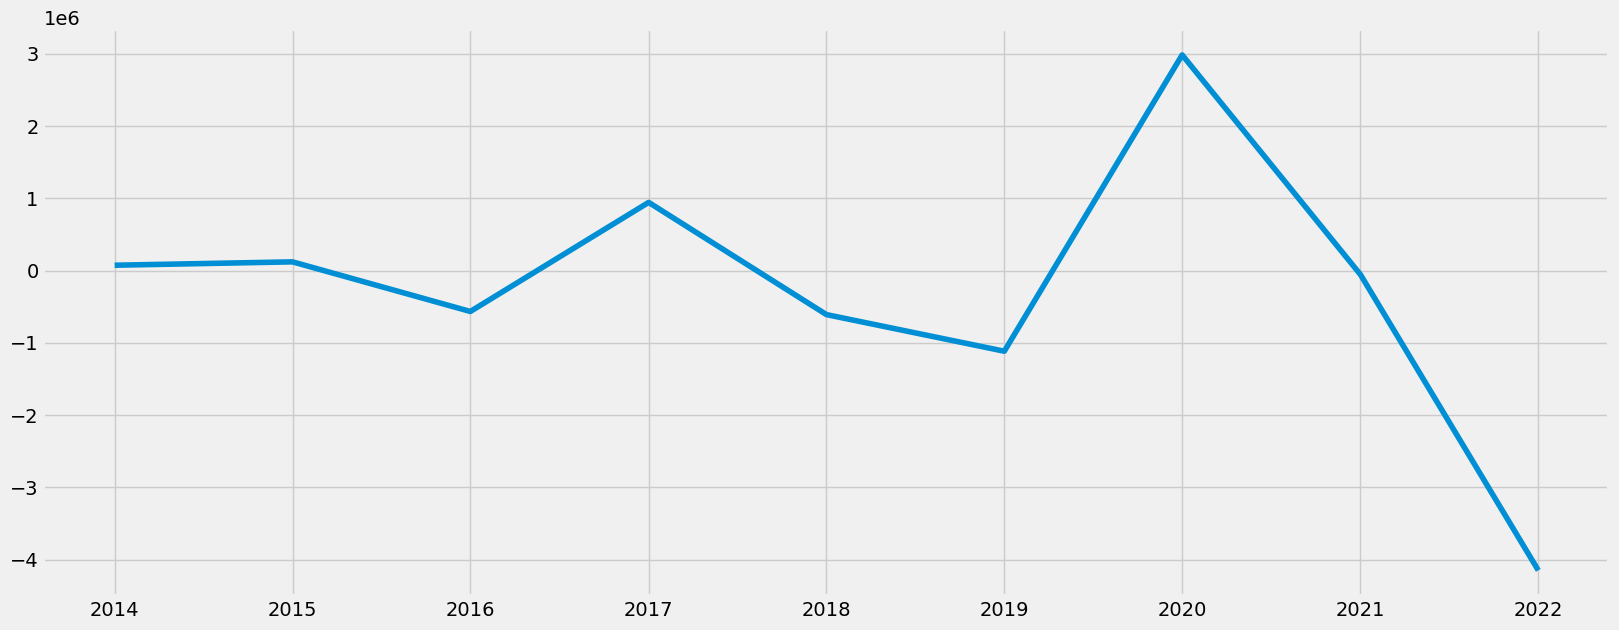

In [35]:
# Plotting the stationary data set. 
plt.plot(df_total_sales_diff_4)

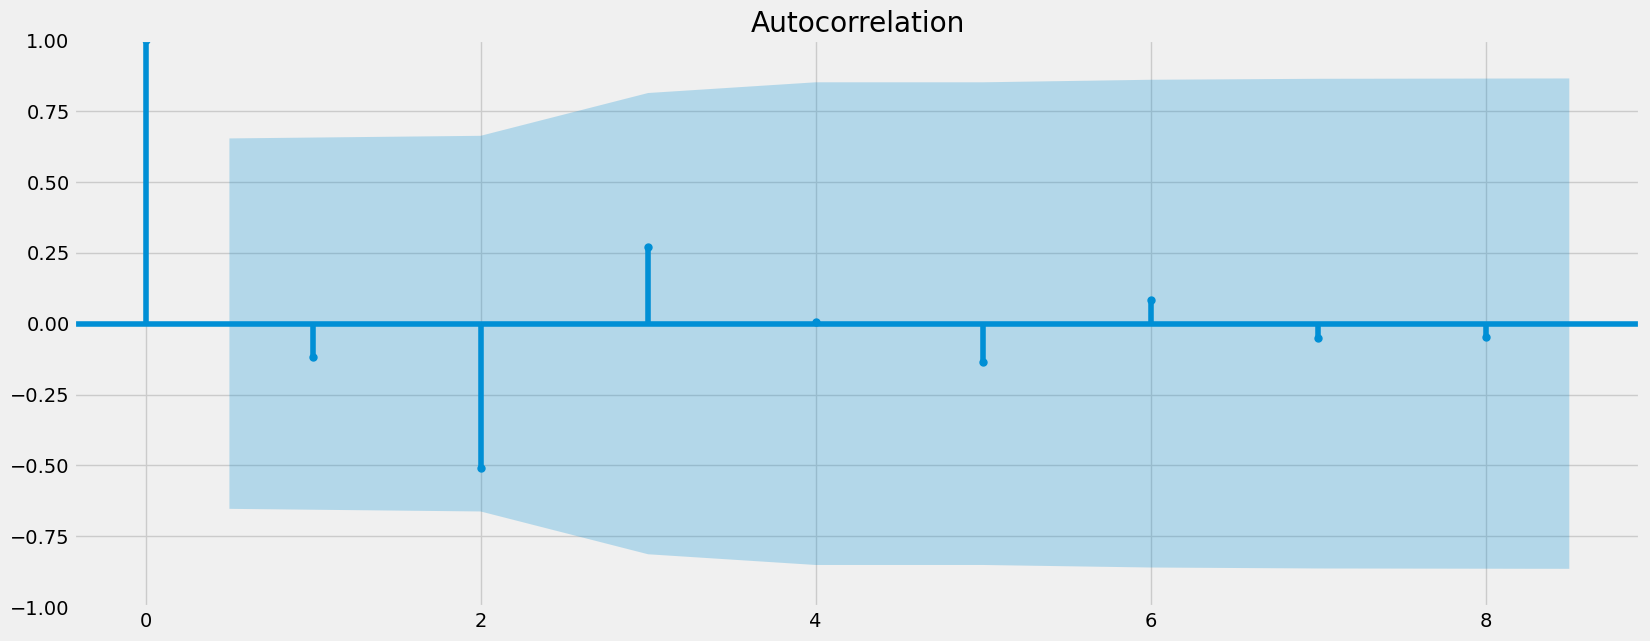

In [36]:
plot_acf(df_total_sales_diff_4)
plt.show()

After four rounds of differencing, it still does not appear as though autocorrelation is an issue with the data set since there are not a significant amount of data points outside the confidence interval. 

# Using Log Transformations to Make Sales Data Stationary

Now, it will be attempted to make the same data set stationary using a log transformation method. This process will start again with the original ev sales data set. 

In [37]:
df_total_sales['ev_sales_log'] = np.log(df_total_sales['ev_sales'])
df_total_sales['ev_sales_log_diff'] = df_total_sales['ev_sales_log'] - df_total_sales['ev_sales_log'].shift(1)

In [38]:
df_total_sales.dropna(inplace = True)

In [39]:
df_total_sales

,ev_sales,ev_sales_log,ev_sales_log_diff
datetime,,,
2011-01-01,53010,10.878236,1.555103
2012-01-01,132061,11.791019,0.912783
2013-01-01,218615,12.295067,0.504048
2014-01-01,357700,12.787450,0.492382
2015-01-01,715780,13.481128,0.693678
2016-01-01,894175,13.703657,0.222529
2017-01-01,1438670,14.179230,0.475573
2018-01-01,2286390,14.642485,0.463255
2019-01-01,2259380,14.630601,-0.011884


<Axes: xlabel='datetime'>

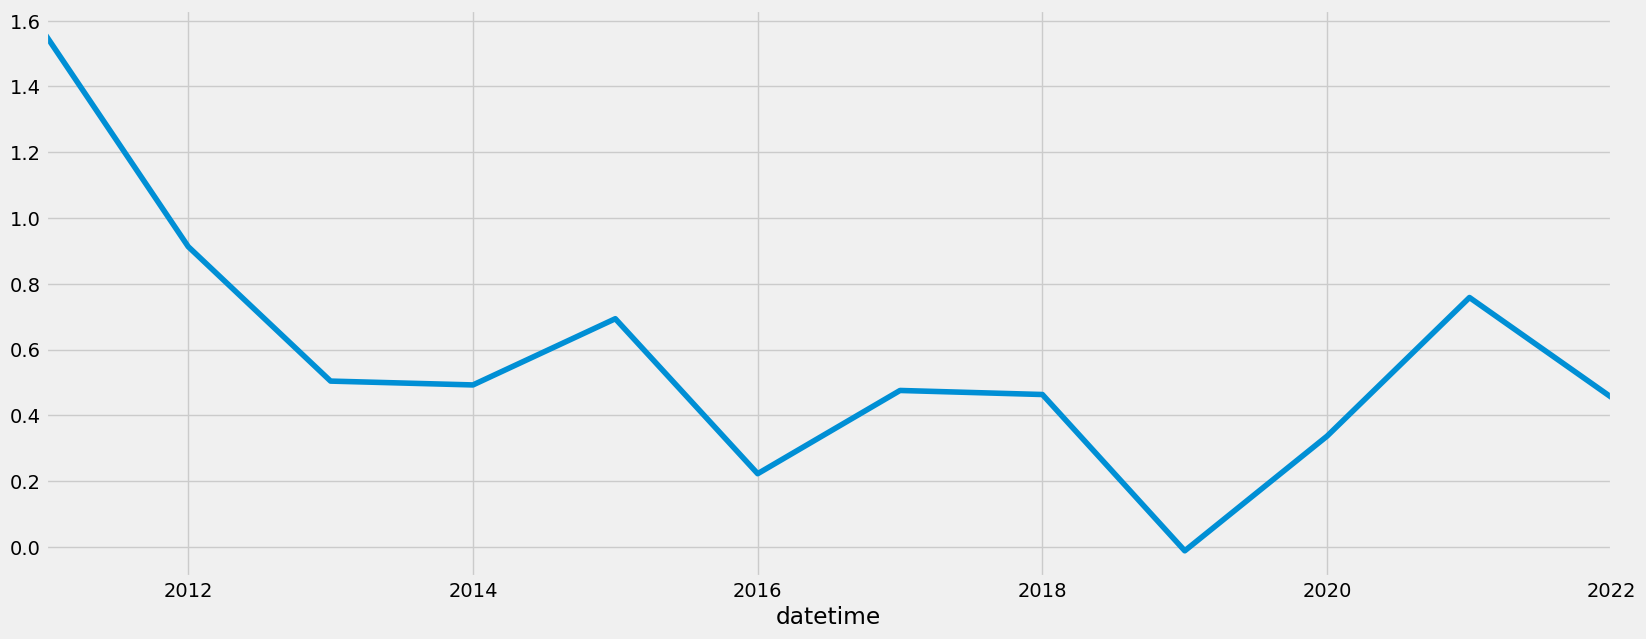

In [40]:
df_total_sales['ev_sales_log_diff'].plot()

In [41]:
# Next the same Dickey Fuller test will be applied to see if the data is stationary after the log transformation

dickey_fuller(df_total_sales['ev_sales_log_diff'])

Dickey-Fuller Stationarity test:
Test Statistic                 -3.220516
p-value                         0.018827
Number of Lags Used             1.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64


Applying a log transformation seemed to move our data much closer to being stationary. Our test statistic of -3.22 is just slightly larger than the critical value of -3.23. Our p-value is at 0.018 which is below the significant level of 0.05 so the results are statistically significant. The null hypothesis cannot be rejected yet, so we cannot say with certainty that the data is stationary, but it is much closer to it now. 

One more log transformation should result in the data set being stationary. 

In [42]:
df_total_sales['ev_sales_log_2'] = np.log(df_total_sales['ev_sales_log_diff'])
df_total_sales['ev_sales_log_diff_2'] = df_total_sales['ev_sales_log_2'] - df_total_sales['ev_sales_log_2'].shift(1)
df_total_sales.dropna(inplace = True)

In [43]:
df_total_sales

,ev_sales,ev_sales_log,ev_sales_log_diff,ev_sales_log_2,ev_sales_log_diff_2
datetime,,,,,
2012-01-01,132061,11.791019,0.912783,-0.091257,-0.532798
2013-01-01,218615,12.295067,0.504048,-0.685083,-0.593827
2014-01-01,357700,12.787450,0.492382,-0.708500,-0.023416
2015-01-01,715780,13.481128,0.693678,-0.365747,0.342752
2016-01-01,894175,13.703657,0.222529,-1.502699,-1.136952
2017-01-01,1438670,14.179230,0.475573,-0.743235,0.759464
2018-01-01,2286390,14.642485,0.463255,-0.769477,-0.026242
2021-01-01,6754200,15.725675,0.758132,-0.276898,0.810944
2022-01-01,10632800,16.179454,0.453779,-0.790145,-0.513247


<Axes: xlabel='datetime'>

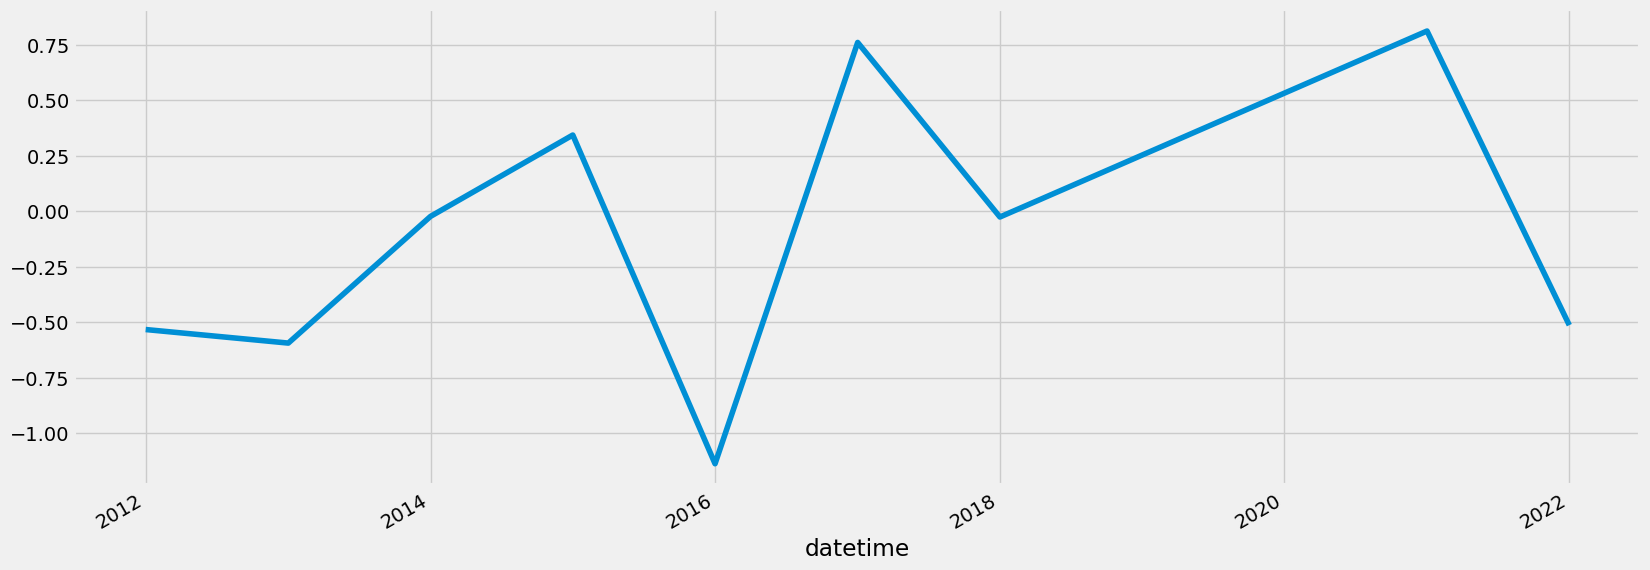

In [44]:
df_total_sales['ev_sales_log_diff_2'].plot()

In [45]:
dickey_fuller(df_total_sales['ev_sales_log_diff_2'])

Dickey-Fuller Stationarity test:
Test Statistic                -3.900093
p-value                        0.002034
Number of Lags Used            0.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


As expected, a second log transformation has resulted in the data being stationary. Our test statistic is at -3.90 vs. a critical value of -3.37 and the p-value is well below 0.05. For this reason the null hypothesis that the data has a unit root/is non-stationary can be rejected and the data set can be used for time series analysis. 

In [46]:
# creating a subset of the dataframe with just the stationary data to test for autocorrelation. 
df_total_sales_station = df_total_sales['ev_sales_log_diff_2']

In [47]:
df_total_sales_station.head()

datetime
2012-01-01   -0.532798
2013-01-01   -0.593827
2014-01-01   -0.023416
2015-01-01    0.342752
2016-01-01   -1.136952
Name: ev_sales_log_diff_2, dtype: float64

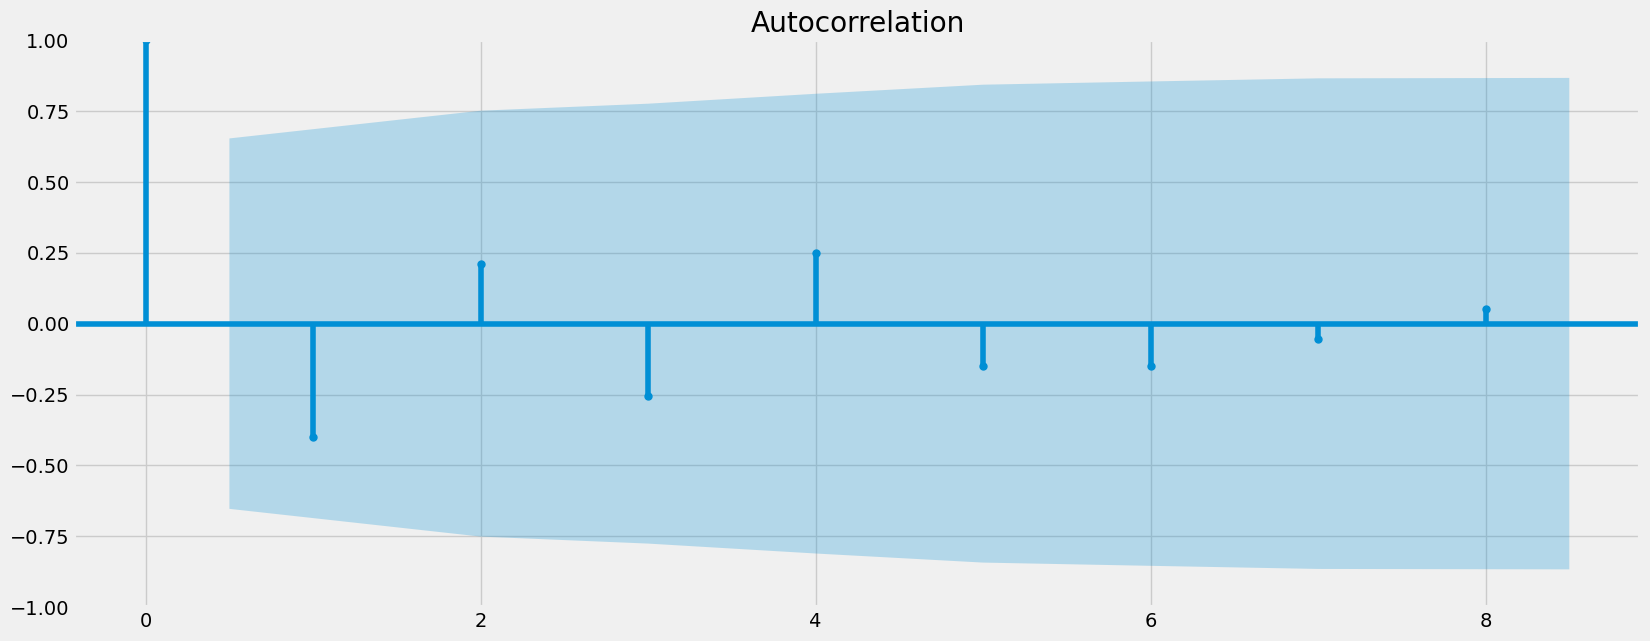

In [48]:
plot_acf(df_total_sales_station)
plt.show()

Similar to when looking at the actual EV sales autocorrelation, the log transformed data does not appear to have significant correlation with lagging values as shown by the lack of data points outide the confidence interval. The data can be used for further time series analysis. 

# Performing Time Series Analysis on Charger Count Data

In [49]:
df_total_data = pd.read_csv(os.path.join(path, 'Electric_Vehicles', 'Data','Cleaned_Data', 'EV_total_imputed.csv'))

In [50]:
# Updating year column to be an Object so it can be concatenated into a format suitable for using with datetime
df_total_data['year'] = df_total_data['year'].apply(lambda x: str(x))
print(df_total_data.dtypes)

region                        object
year                          object
ev_sales                       int64
ev_stock                       int64
ev_sales_share               float64
ev_stock_share               float64
charger_count                float64
share_of_stock_sold          float64
vehicles_sold_per_charger    float64
vehicle_stock_per_charger    float64
dtype: object


In [51]:
df_total_data['full_date'] = "01-01-" + df_total_data['year']

In [52]:
df_total_data.head()

,region,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold,vehicles_sold_per_charger,vehicle_stock_per_charger,full_date
0,Australia,2010,0,0,0.00000,0.00000,0.0,0.00000,0.0,0.0,01-01-2010
1,Australia,2011,49,49,0.00007,0.00000,0.0,1.00000,0.0,0.0,01-01-2011
2,Australia,2012,250,300,0.00030,0.00003,0.0,0.83333,0.0,0.0,01-01-2012
3,Australia,2013,290,590,0.00034,0.00005,0.0,0.49153,0.0,0.0,01-01-2013
4,Australia,2014,1320,1880,0.00160,0.00017,0.0,0.70213,0.0,0.0,01-01-2014


# Creating a Subset of Data for just EV Chargers

In [53]:
# Creating a subset of the dataframe that only includes rows for the entire World
df_total_chargers = df_total_data[(df_total_data['region']== 'World')]

In [54]:
df_total_chargers.head(20)

,region,year,ev_sales,ev_stock,ev_sales_share,ev_stock_share,charger_count,share_of_stock_sold,vehicles_sold_per_charger,vehicle_stock_per_charger,full_date
403,World,2010,11194,28010,0.00013,0.00003,3990.0,0.39964,2.8,7.0,01-01-2010
404,World,2011,53010,80820,0.00063,0.00008,10826.2,0.65590,4.9,7.5,01-01-2011
405,World,2012,132061,220090,0.00149,0.00019,30089.2,0.60003,4.4,7.3,01-01-2012
406,World,2013,218615,434570,0.00244,0.00037,44191.2,0.50306,4.9,9.8,01-01-2013
407,World,2014,357700,786660,0.00389,0.00065,102357.2,0.45471,3.5,7.7,01-01-2014
408,World,2015,715780,1469400,0.00759,0.00116,178945.4,0.48712,4.0,8.2,01-01-2015
409,World,2016,894175,2386005,0.00889,0.00186,308887.4,0.37476,2.9,7.7,01-01-2016
410,World,2017,1438670,3726700,0.01426,0.00280,421694.4,0.38604,3.4,8.8,01-01-2017
411,World,2018,2286390,6034800,0.02149,0.00441,533034.3,0.37887,4.3,11.3,01-01-2018
412,World,2019,2259380,8334800,0.02315,0.00577,871450.3,0.27108,2.6,9.6,01-01-2019


In [55]:
# Creating another subset that only includes date and charger count 
df_chargers = df_total_chargers[['full_date', 'charger_count']]

In [56]:
df_chargers

,full_date,charger_count
403,01-01-2010,3990.0
404,01-01-2011,10826.2
405,01-01-2012,30089.2
406,01-01-2013,44191.2
407,01-01-2014,102357.2
408,01-01-2015,178945.4
409,01-01-2016,308887.4
410,01-01-2017,421694.4
411,01-01-2018,533034.3
412,01-01-2019,871450.3


In [57]:
# Using datetime to set the "full_date" column as the index. 

from datetime import datetime

df_chargers['datetime'] = pd.to_datetime(df_chargers['full_date']) 
df_chargers = df_chargers.set_index('datetime') 
df_chargers.drop(['full_date'], axis=1, inplace=True) 
df_chargers.head()

,charger_count
datetime,
2010-01-01,3990.0
2011-01-01,10826.2
2012-01-01,30089.2
2013-01-01,44191.2
2014-01-01,102357.2


In [58]:
df_chargers

,charger_count
datetime,
2010-01-01,3990.0
2011-01-01,10826.2
2012-01-01,30089.2
2013-01-01,44191.2
2014-01-01,102357.2
2015-01-01,178945.4
2016-01-01,308887.4
2017-01-01,421694.4
2018-01-01,533034.3


# Performing Time Series Analysis on Charger Count

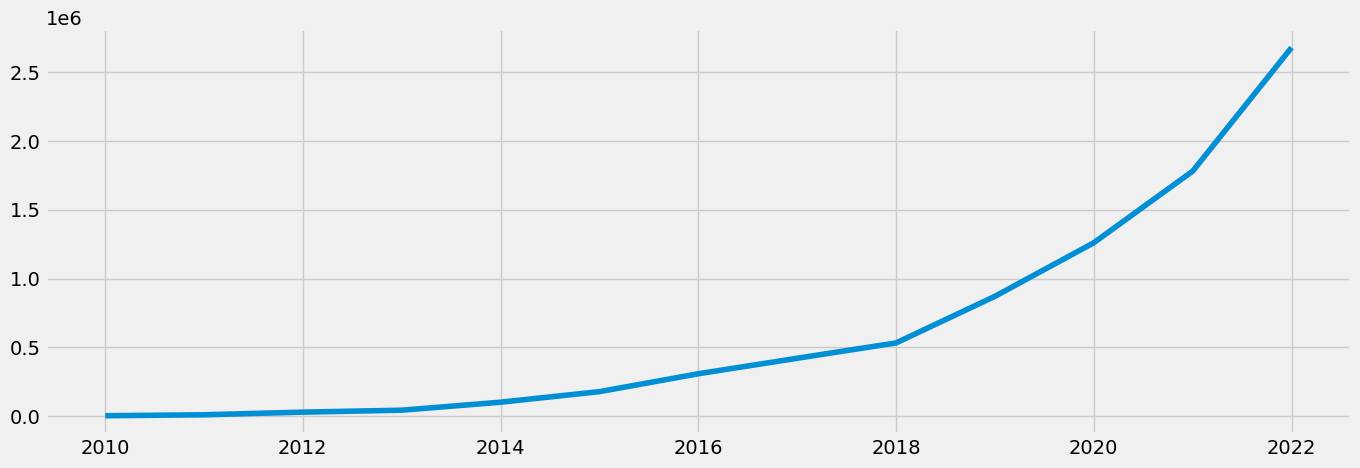

In [59]:
# Plot the new sales data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_chargers)

Since the data is clearly not linear and seems to be showing exponential growth, a multiplicative model for decomposition will be used. 

In [60]:
# Decompose the time series using a multiplicative model

decomposition_chargers = sm.tsa.seasonal_decompose(df_chargers, model='multiplicative')

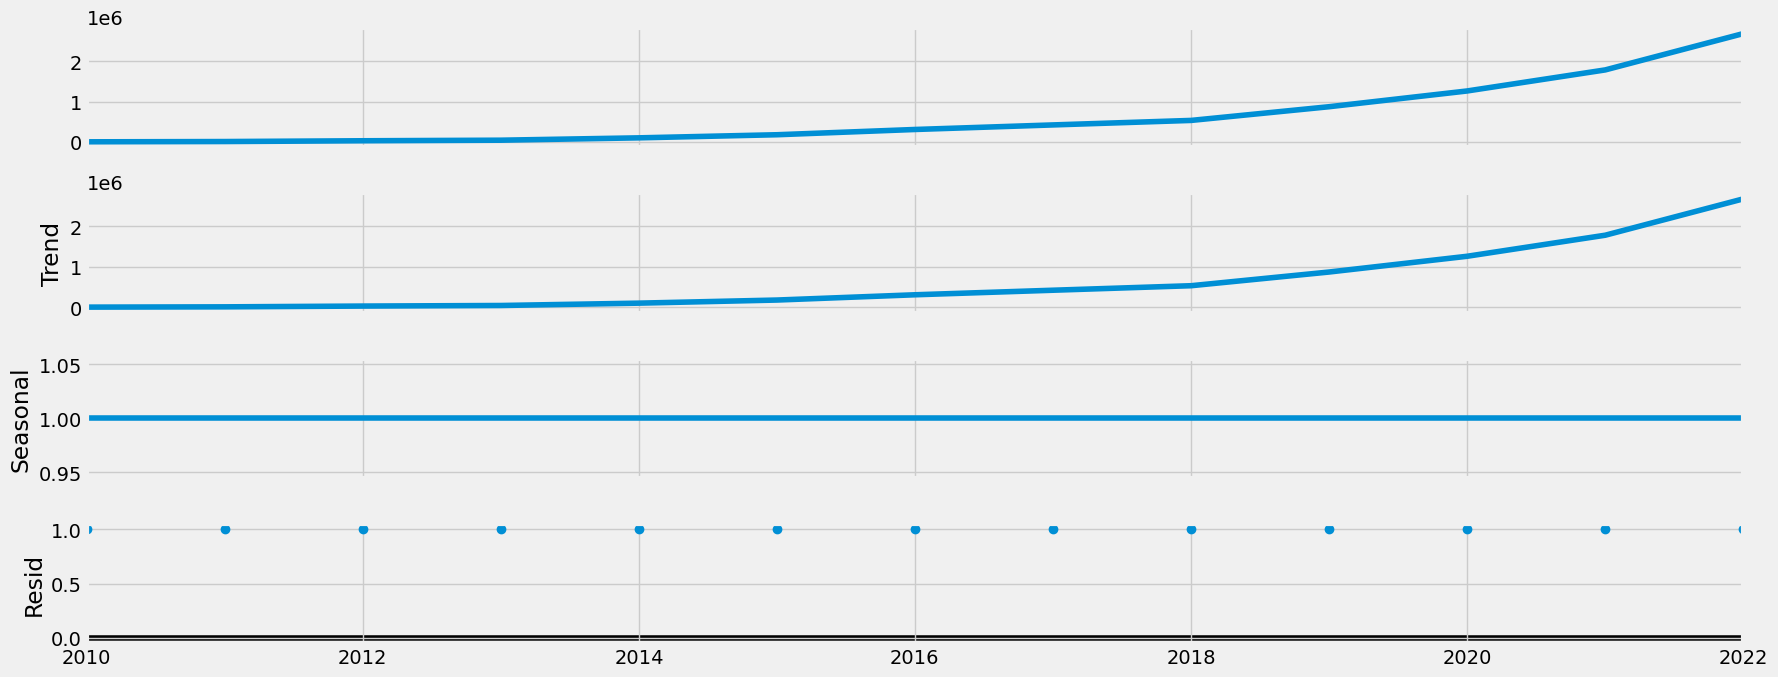

In [61]:
# Plot the separate components

decomposition_chargers.plot()
plt.show()

Simmilar to the decomposition of the EV sales data, it seems as though the only driver of change in the data set is the growth trend. 

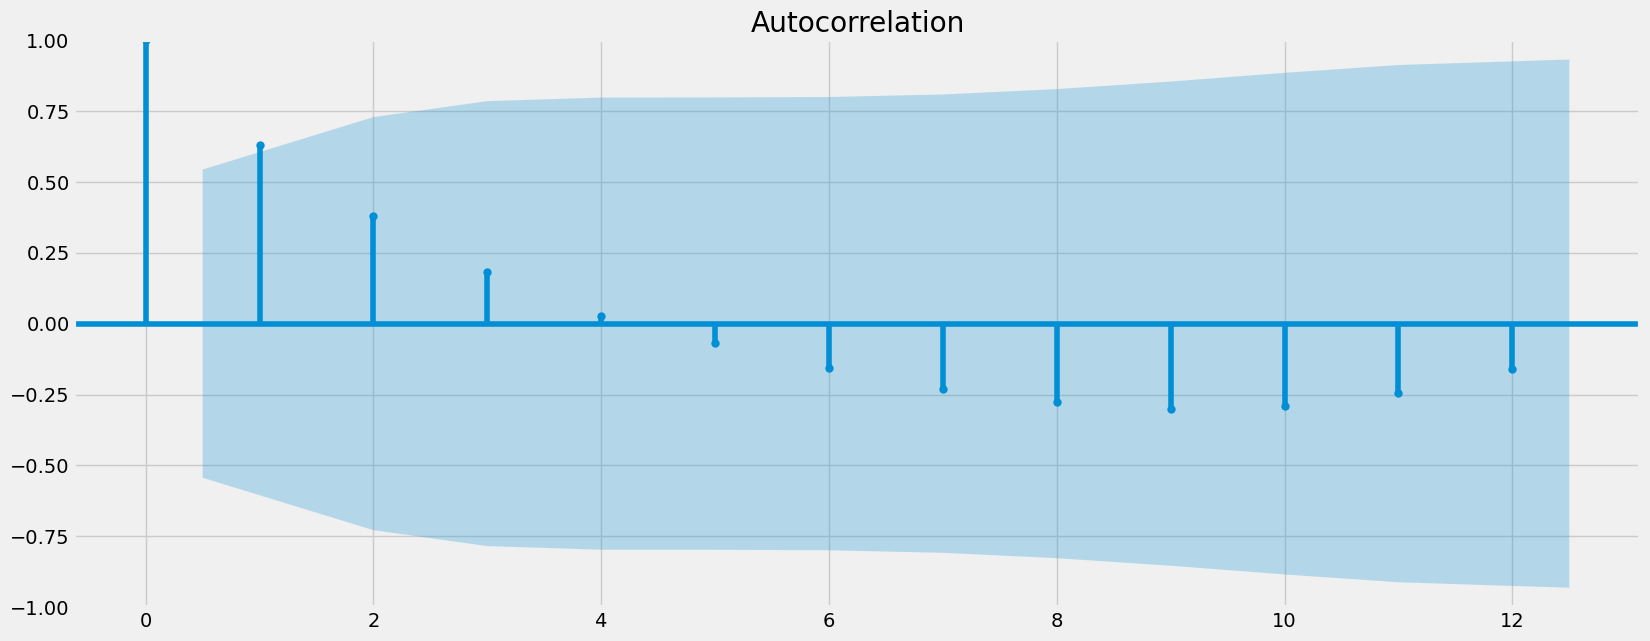

In [62]:
plot_acf(df_chargers)
plt.show()

Also similar to the EV sales, autocorrelation does not appear to be an issue with the charger count data set. 

In [63]:
# performing a dickey fuller test to confirm the data is not stationary. 


dickey_fuller(df_chargers['charger_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 2.723031
p-value                        0.999088
Number of Lags Used            4.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


As expected based on the plot the data, it is not stationary. The test statistic is well above the critical value, meaning the null hypothesis that the data has a unit root cannot be rejected. 

Next, repeated differencing will be used to make the data stationary. 

In [64]:
df_chargers_diff = df_chargers - df_chargers.shift(1) 

In [65]:
df_chargers_diff.dropna(inplace = True) 

In [66]:
df_chargers_diff.head()

,charger_count
datetime,
2011-01-01,6836.2
2012-01-01,19263.0
2013-01-01,14102.0
2014-01-01,58166.0
2015-01-01,76588.2


In [67]:
dickey_fuller(df_chargers_diff['charger_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.528994
p-value                        0.997628
Number of Lags Used            4.000000
Number of Observations Used    7.000000
Critical Value (1%)           -4.938690
Critical Value (5%)           -3.477583
Critical Value (10%)          -2.843868
dtype: float64


In [68]:
df_chargers_diff_2 = df_chargers_diff - df_chargers_diff.shift(1) 

In [69]:
df_chargers_diff_2.dropna(inplace = True) 

In [70]:
dickey_fuller(df_chargers_diff_2['charger_count'])

Dickey-Fuller Stationarity test:
Test Statistic                 1.060355
p-value                        0.994864
Number of Lags Used            2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [71]:
df_chargers_diff_3 = df_chargers_diff_2 - df_chargers_diff_2.shift(1) 

In [72]:
df_chargers_diff_3.dropna(inplace = True) 

In [73]:
dickey_fuller(df_chargers_diff_3['charger_count'])

Dickey-Fuller Stationarity test:
Test Statistic                -4.462930
p-value                        0.000229
Number of Lags Used            1.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


Three rounds of differencing was enough to make the charger data stationary. The null hypothesis that the data has a unit root can be rejected, and it can be used for time series analysos. 

In [74]:
df_chargers_diff_3

,charger_count
datetime,
2013-01-01,-17587.8
2014-01-01,49225.0
2015-01-01,-25641.8
2016-01-01,34931.6
2017-01-01,-70488.8
2018-01-01,15667.9
2019-01-01,228543.2
2020-01-01,-176682.2
2021-01-01,81973.0


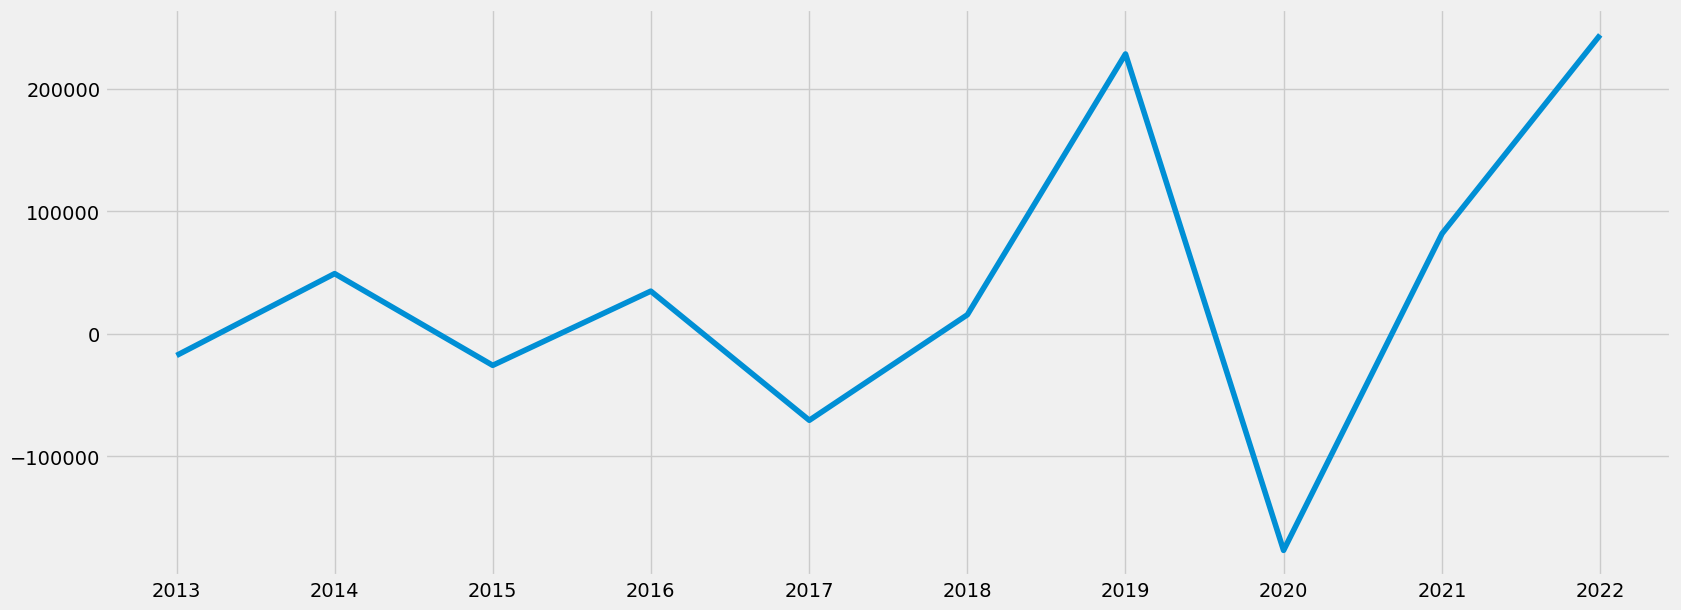

In [75]:
# Plotting stationary data 
plt.plot(df_chargers_diff_3)

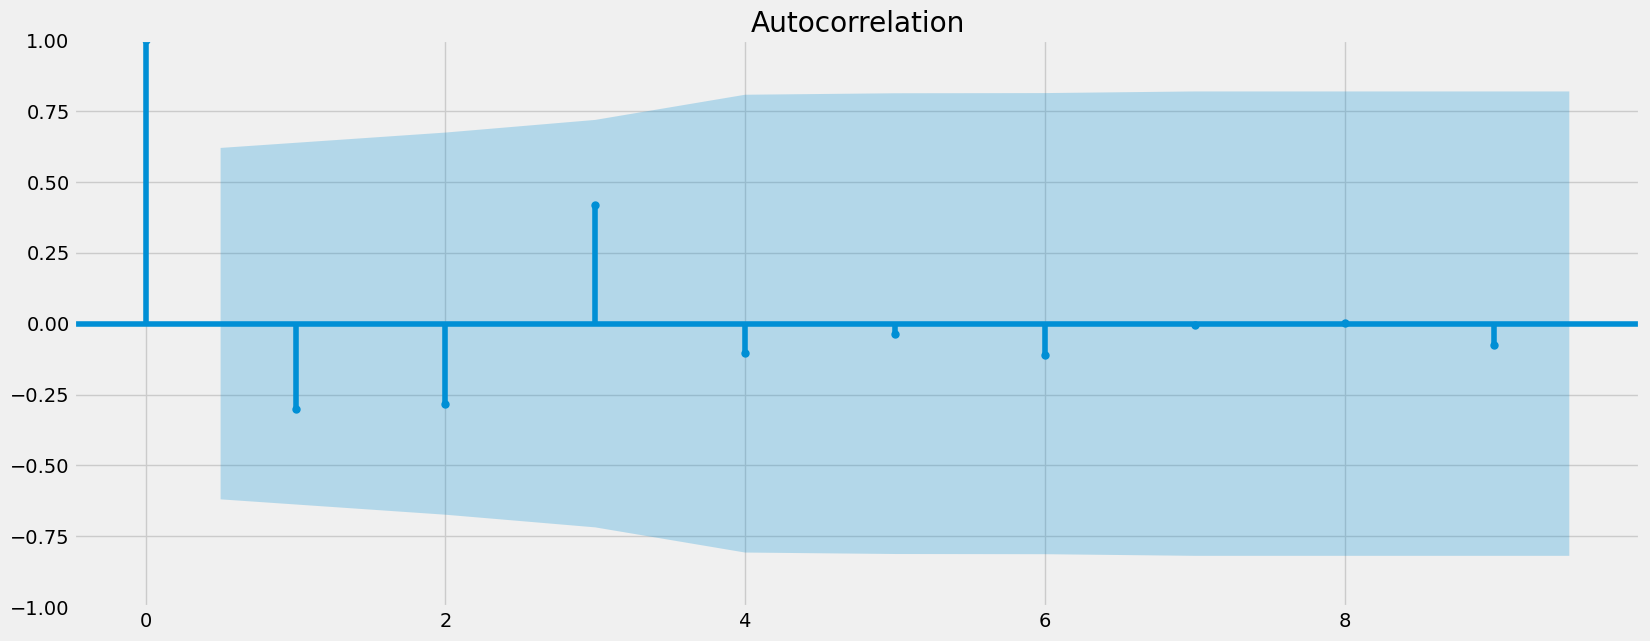

In [76]:
plot_acf(df_chargers_diff_3)
plt.show()

Again autocorrelation does not appear to be an issue with the differenced data and it is good to use in a time series analysis. 